<a href="https://colab.research.google.com/github/CheYuuuu/TensorFlow/blob/main/and%08_or_xor%E9%82%8F%E8%BC%AF%E9%96%98keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please select training target: And=>1 , Or=>2 , Xor=>3 
3
How many training cycles: 1000
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.49855265 0.5014473 ]
 [0.49457562 0.5054244 ]
 [0.5041998  0.49580014]
 [0.50237733 0.49762267]]
answer after learning:  1 1 0 0
****Error Curve****


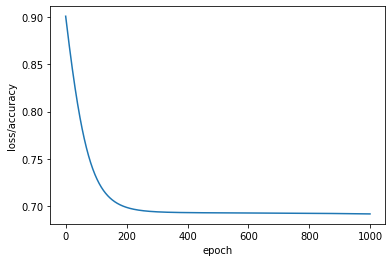

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_train = [(0.0,0.0), (0.0,1.0), (1.0,0.0), (1.0,1.0)] #input data(training data)
select = eval(input('Please select training target: And=>1 , Or=>2 , Xor=>3 \n'))
#desired output (Learning target)
if select == 1:
    y_train = [0.0, 0.0, 0.0, 1.0]
if select == 2:
    y_train = [0.0, 1.0, 1.0, 1.0]
if select == 3:
    y_train = [0.0, 1.0, 1.0, 0.0]

In_neuron = 2 
Hiden1_neuron = 10
Hiden2_neuron = 10
Out_neuron = 1
Out_type = 2 
TC = eval(input('How many training cycles: ')) #set up for training cycles

#set up Neuron Network Frame: Two input, one output, one middle-Layer with two neurons,
# activation = tanh
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense( Hiden1_neuron, activation = tf.nn.sigmoid, input_dim = In_neuron),
    tf.keras.layers.Dense( Hiden2_neuron, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(Out_neuron, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(Out_type, activation=tf.nn.softmax)])

#Optimize
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Way of train: set up cycle times, record every cycles data in history
history = model.fit(x_train, y_train,
                    epochs=TC,
                    batch_size=4,verbose=0)
#solution predict 
x_test = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0], [1.0,1.0]]) #Test data
print(x_test)
y_test = model.predict(x_test) 
#test output, present by probability, bigger probability is the answer of predict 
print(y_test)
#Through numpy.argmax show answer, numpy.argmax will choose bigger probability in array to be answer.
print("answer after learning: ", 
      np.argmax(y_test[0]), np.argmax(y_test[1]), np.argmax(y_test[2]), np.argmax(y_test[3]))
#plot error curve
print("****Error Curve****")
#plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
#plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()


